In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [3]:

from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# MaxPooling layer 1
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# MaxPooling layer 2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(units=128, activation='relu'))

# Dropout to reduce overfitting
model.add(layers.Dropout(rate=0.5))

# Output layer
model.add(layers.Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)             

Epoch 1/20


1563/1563 [==============================] - 22s 12ms/step - loss: 1.6079 - accuracy: 0.4158 - val_loss: 1.2429 - val_accuracy: 0.5608
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2923 - accuracy: 0.5385 - val_loss: 1.1269 - val_accuracy: 0.5971
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1724 - accuracy: 0.5859 - val_loss: 1.0253 - val_accuracy: 0.6475
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0930 - accuracy: 0.6138 - val_loss: 0.9620 - val_accuracy: 0.6659
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0234 - accuracy: 0.6399 - val_loss: 0.9721 - val_accuracy: 0.6716
Epoch 6/20
1563/1563 [==============================] - 20s 12ms/step - loss: 0.9703 - accuracy: 0.6592 - val_loss: 0.9414 - val_accuracy: 0.6765
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9185 - accuracy: 0.6759 - val_loss: 0.9051

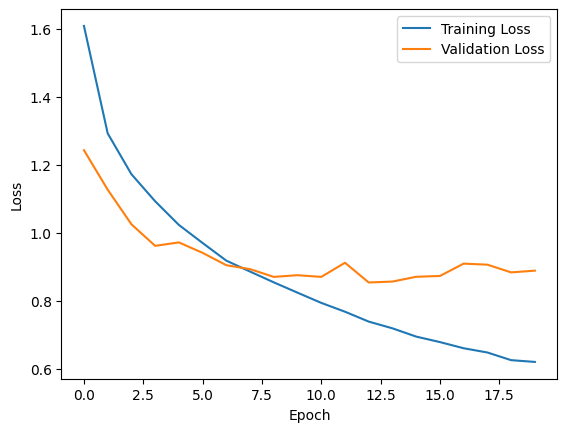

In [4]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Assuming you have already defined and compiled your model

# Define the optimizer with a suitable learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Replace 0.001 with your preferred learning rate

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Assuming you have already trained your model and loaded the testing dataset

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

# Make predictions on the testing dataset
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# True labels
true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate precision and recall
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

# Print results
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


313/313 - 2s - loss: 0.8891 - accuracy: 0.7138 - 2s/epoch - 6ms/step
313/313 [==============================] - 2s 5ms/step
Test Accuracy: 71.38%
Confusion Matrix:
[[797   6  44  15  17   8   7  10  70  26]
 [ 23 821   6   9   4   3   5   2  26 101]
 [ 81   5 563  69  96  61  68  28  22   7]
 [ 30  10  66 559  86 132  57  27  19  14]
 [ 25   1  61  68 706  21  38  62  16   2]
 [ 23   6  65 231  57 545  16  36   9  12]
 [ 10   5  41  69  46  20 792   5   8   4]
 [ 22   1  36  40  95  69   1 722   2  12]
 [ 81  34  11  14   8   6   4   3 811  28]
 [ 28  61   7  19   9   6   6  12  30 822]]
Precision: 0.7160
Recall: 0.7138


Epoch 1/20
1563/1563 - 18s - loss: 0.5110 - accuracy: 0.8099 - val_loss: 0.8985 - val_accuracy: 0.7282 - 18s/epoch - 11ms/step
Epoch 2/20
1563/1563 - 19s - loss: 0.4875 - accuracy: 0.8164 - val_loss: 0.9032 - val_accuracy: 0.7291 - 19s/epoch - 12ms/step
Epoch 3/20
1563/1563 - 19s - loss: 0.4763 - accuracy: 0.8234 - val_loss: 0.9028 - val_accuracy: 0.7300 - 19s/epoch - 12ms/step
Epoch 4/20
1563/1563 - 20s - loss: 0.4668 - accuracy: 0.8247 - val_loss: 0.9074 - val_accuracy: 0.7297 - 20s/epoch - 12ms/step
Epoch 5/20
1563/1563 - 19s - loss: 0.4555 - accuracy: 0.8312 - val_loss: 0.9128 - val_accuracy: 0.7307 - 19s/epoch - 12ms/step
Epoch 6/20
1563/1563 - 20s - loss: 0.4567 - accuracy: 0.8298 - val_loss: 0.9140 - val_accuracy: 0.7332 - 20s/epoch - 12ms/step
Epoch 7/20
1563/1563 - 20s - loss: 0.4463 - accuracy: 0.8335 - val_loss: 0.9256 - val_accuracy: 0.7313 - 20s/epoch - 13ms/step
Epoch 8/20
1563/1563 - 20s - loss: 0.4412 - accuracy: 0.8345 - val_loss: 0.9315 - val_accuracy: 0.7317 - 20s/ep

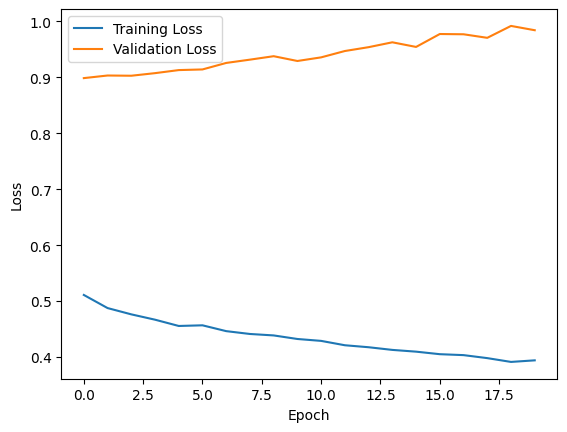

In [6]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Assuming you have already defined your model architecture

# Define the optimizer with a learning rate of 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), verbose=2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
1563/1563 - 20s - loss: 1.6902 - accuracy: 0.4047 - val_loss: 1.4740 - val_accuracy: 0.4784 - 20s/epoch - 13ms/step
Epoch 2/20
1563/1563 - 19s - loss: 1.6107 - accuracy: 0.4333 - val_loss: 1.4841 - val_accuracy: 0.4680 - 19s/epoch - 12ms/step
Epoch 3/20
1563/1563 - 19s - loss: 1.6105 - accuracy: 0.4370 - val_loss: 1.4452 - val_accuracy: 0.4897 - 19s/epoch - 12ms/step
Epoch 4/20
1563/1563 - 19s - loss: 1.6273 - accuracy: 0.4325 - val_loss: 1.5658 - val_accuracy: 0.4550 - 19s/epoch - 12ms/step
Epoch 5/20
1563/1563 - 19s - loss: 1.6192 - accuracy: 0.4383 - val_loss: 1.4541 - val_accuracy: 0.4992 - 19s/epoch - 12ms/step
Epoch 6/20
1563/1563 - 19s - loss: 1.6296 - accuracy: 0.4362 - val_loss: 1.5897 - val_accuracy: 0.4541 - 19s/epoch - 12ms/step
Epoch 7/20
1563/1563 - 19s - loss: 1.5895 - accuracy: 0.4490 - val_loss: 1.4000 - val_accuracy: 0.5245 - 19s/epoch - 12ms/step
Epoch 8/20
1563/1563 - 18s - loss: 1.6080 - accuracy: 0.4438 - val_loss: 1.3994 - val_accuracy: 0.5101 - 18s/ep

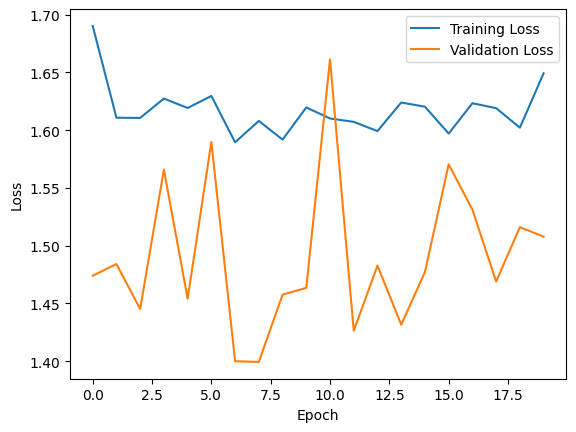

In [7]:
# Assuming you have already defined your model architecture

# Define the optimizer with a learning rate of 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), verbose=2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
1563/1563 - 22s - loss: 2.3201 - accuracy: 0.1012 - val_loss: 2.3393 - val_accuracy: 0.1000 - 22s/epoch - 14ms/step
Epoch 2/20
1563/1563 - 20s - loss: 2.3154 - accuracy: 0.1011 - val_loss: 2.3166 - val_accuracy: 0.1000 - 20s/epoch - 13ms/step
Epoch 3/20
1563/1563 - 19s - loss: 2.3161 - accuracy: 0.1002 - val_loss: 2.3259 - val_accuracy: 0.1000 - 19s/epoch - 12ms/step
Epoch 4/20
1563/1563 - 20s - loss: 2.3155 - accuracy: 0.0990 - val_loss: 2.3243 - val_accuracy: 0.1000 - 20s/epoch - 13ms/step
Epoch 5/20
1563/1563 - 20s - loss: 2.3154 - accuracy: 0.0997 - val_loss: 2.3054 - val_accuracy: 0.1000 - 20s/epoch - 13ms/step
Epoch 6/20
1563/1563 - 20s - loss: 2.3154 - accuracy: 0.1001 - val_loss: 2.3194 - val_accuracy: 0.1000 - 20s/epoch - 13ms/step
Epoch 7/20
1563/1563 - 20s - loss: 2.3151 - accuracy: 0.1027 - val_loss: 2.3218 - val_accuracy: 0.1000 - 20s/epoch - 13ms/step
Epoch 8/20
1563/1563 - 20s - loss: 2.3151 - accuracy: 0.1005 - val_loss: 2.3146 - val_accuracy: 0.1000 - 20s/ep

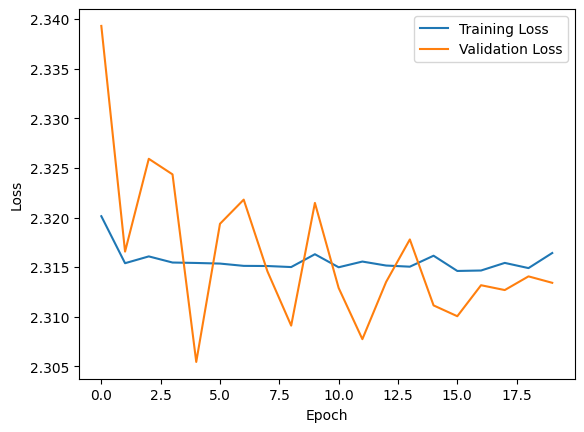

In [8]:
# Assuming you have already defined your model architecture

# Define the optimizer with a learning rate of 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

# Compile the model with sparse categorical crossentropy loss
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), verbose=2)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:

from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


# Load ResNet50 model pre-trained on ImageNet, excluding the top (fully connected) layers
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers so that they are not trained during fine-tuning
for layer in resnet_model.layers:
    layer.trainable = False

# Create a new model by adding custom top layers for CIFAR-10 classification
model_resnet = models.Sequential([
    resnet_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Load VGG16 model pre-trained on ImageNet, excluding the top (fully connected) layers
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model with custom top layers for CIFAR-10 classification
model_vgg = models.Sequential([
    vgg_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg = model_vgg.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


94765736/94765736 [==============================] - 17s 0us/step
Epoch 1/10
1563/1563 [==============================] - 222s 137ms/step - loss: 2.2442 - accuracy: 0.1468 - val_loss: 2.1292 - val_accuracy: 0.2159
Epoch 2/10
1563/1563 [==============================] - 210s 134ms/step - loss: 2.1631 - accuracy: 0.1741 - val_loss: 2.0699 - val_accuracy: 0.2659
Epoch 3/10
1563/1563 [==============================] - 213s 137ms/step - loss: 2.1385 - accuracy: 0.1868 - val_loss: 2.0486 - val_accuracy: 0.2789
Epoch 4/10
1563/1563 [==============================] - 210s 135ms/step - loss: 2.1232 - accuracy: 0.1920 - val_loss: 2.0364 - val_accuracy: 0.2626
Epoch 5/10
1563/1563 [==============================] - 210s 134ms/step - loss: 2.1092 - accuracy: 0.2017 - val_loss: 2.0006 - val_accuracy: 0.2978
Epoch 6/10
1563/1563 [==============================] - 210s 134ms/step - loss: 2.0989 - accuracy: 0.2054 - val_loss: 1.9762 - val_accuracy: 0.3042
Epoch 7/10
1563/1563 [========================

In [10]:
# Print training and validation loss for each epoch
def print_loss(history):
    for epoch, loss, val_loss in zip(range(1, len(history.history['loss']) + 1), history.history['loss'], history.history['val_loss']):
        print(f'Epoch {epoch}/{len(history.history["loss"])} - Loss: {loss:.4f} - Validation Loss: {val_loss:.4f}')

print("ResNet50:")
print_loss(history_resnet)

print("\nVGG16:")
print_loss(history_vgg)

ResNet50:
Epoch 1/10 - Loss: 2.2442 - Validation Loss: 2.1292
Epoch 2/10 - Loss: 2.1631 - Validation Loss: 2.0699
Epoch 3/10 - Loss: 2.1385 - Validation Loss: 2.0486
Epoch 4/10 - Loss: 2.1232 - Validation Loss: 2.0364
Epoch 5/10 - Loss: 2.1092 - Validation Loss: 2.0006
Epoch 6/10 - Loss: 2.0989 - Validation Loss: 1.9762
Epoch 7/10 - Loss: 2.0927 - Validation Loss: 2.0189
Epoch 8/10 - Loss: 2.0821 - Validation Loss: 1.9738
Epoch 9/10 - Loss: 2.0696 - Validation Loss: 1.9245
Epoch 10/10 - Loss: 2.0665 - Validation Loss: 1.9359

VGG16:
Epoch 1/10 - Loss: 1.4421 - Validation Loss: 1.2546
Epoch 2/10 - Loss: 1.2665 - Validation Loss: 1.1960
Epoch 3/10 - Loss: 1.2156 - Validation Loss: 1.1711
Epoch 4/10 - Loss: 1.1823 - Validation Loss: 1.1476
Epoch 5/10 - Loss: 1.1522 - Validation Loss: 1.1442
Epoch 6/10 - Loss: 1.1325 - Validation Loss: 1.1335
Epoch 7/10 - Loss: 1.1099 - Validation Loss: 1.1144
Epoch 8/10 - Loss: 1.0906 - Validation Loss: 1.1163
Epoch 9/10 - Loss: 1.0748 - Validation Loss: 

In [11]:
# Evaluate ResNet50 model
test_loss_resnet, test_accuracy_resnet = model_resnet.evaluate(test_images, test_labels, verbose=2)
print(f'ResNet50 - Test Accuracy: {test_accuracy_resnet * 100:.2f}%')

# Evaluate VGG16 model
test_loss_vgg, test_accuracy_vgg = model_vgg.evaluate(test_images, test_labels, verbose=2)
print(f'VGG16 - Test Accuracy: {test_accuracy_vgg * 100:.2f}%')

313/313 - 25s - loss: 1.9359 - accuracy: 0.3209 - 25s/epoch - 81ms/step
ResNet50 - Test Accuracy: 32.09%
313/313 - 30s - loss: 1.1057 - accuracy: 0.6136 - 30s/epoch - 95ms/step
VGG16 - Test Accuracy: 61.36%


In [12]:
# Evaluate custom CNN model
test_loss_custom, test_accuracy_custom = model.evaluate(test_images, test_labels, verbose=2)
print(f'Custom CNN Model - Test Accuracy: {test_accuracy_custom * 100:.2f}%')


313/313 - 2s - loss: 2.3134 - accuracy: 0.1000 - 2s/epoch - 5ms/step
Custom CNN Model - Test Accuracy: 10.00%
